# Compte rendu du mini projet n°2 

### Introduction
Ce mini projet a comme objectif expliciter et etudier le comportement chaotique mais deterministe d'une suite numerique (on considere l’équation logistique x<sub>n+1</sub>=r.x<sub>n</sub>.(1-x<sub>n</sub>) , r etant un parametre arbitraire).

### Comportement de la suite

Text(0.5, 1.0, 'La suite pour differentes valeurs du parametres (r)')

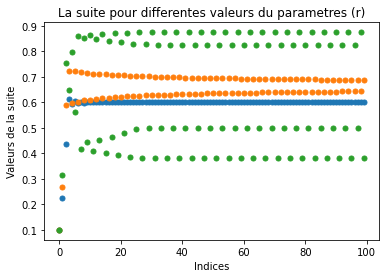

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

  # Definition de la suite reccurrente
def f(x,r,n):
    n=abs(int(n))         #dans le cas ou on donne a 'n' une valeur non naturelle
    if n==0:
        return x
    else :
        a=f(x,r,n-1)      #calcul du (n-1)ieme terme
        return a*r*(1-a)

    #def des lists a ploter
x=[i for i in range(100)]
y1=[f(0.1,2.5,i) for i in x]
y2 =[f(0.1,3,i) for i in x]
y3=[f(0.1,3.5,i) for i in x]

   # les graphes
plt.plot(x,y1,'o', label='la suite pour r=2.5',ms=5)   
plt.plot(x,y2,'o', label='la suite pour r=3',ms=5)    
plt.plot(x,y3,'o', label='la suite pour r=3.5',ms=5)

plt.xlabel("Indices")
plt.ylabel('Valeurs de la suite')
plt.title('La suite pour differentes valeurs du parametres (r)')

On voit bien qu'une valeur de *r* differente de *0.5* ( change enormement le comportement de la suite.

### Diagramme de bifurcation

Text(0.5, 1.0, 'Diagramme de Bifurcation')

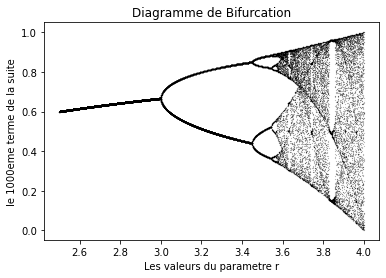

In [2]:
import random

# Creation du tableau des valeurs du parametre 'r'
x=np.linspace(2.5,4,50000)
y=[]

# Remplissage de la liste 'y' 
for r in x :
    a=0.001*random.random()
    a=f(a,r,1000)
    y.append(a)

plt.plot(x,y,'o',ms=0.1,color='black')
plt.xlabel("Les valeurs du parametre r")
plt.ylabel("le 1000eme terme de la suite")
plt.title('Diagramme de Bifurcation')

 ##### * Explication du code (partie du remplissage de la liste *y*)
 Pour chaque valeur de *r*, nous allons choisir une valeur initiale pseudo-aleatoire *x* et on calcule l'image de ce couple (x,r) . Cela nous evitera de rester sur une seule branche du 'graphe' voulu (puisque pour toute valeur initiale *x* de la suite *f* on a une unique image *f(r)*, mais si pour chaque *r* on choisit une valeur initiale *x(r)* on va a chaque fois prendre un point d'un des graphes *f(x,r,1000)*).

### Exposant de Lyapunov

On voit que plus  *r*  se rapproche de  *4*  et plus l'ensemble des points d'adherences est grand.

Text(0.5, 1.0, 'Exposant de Lyapunov')

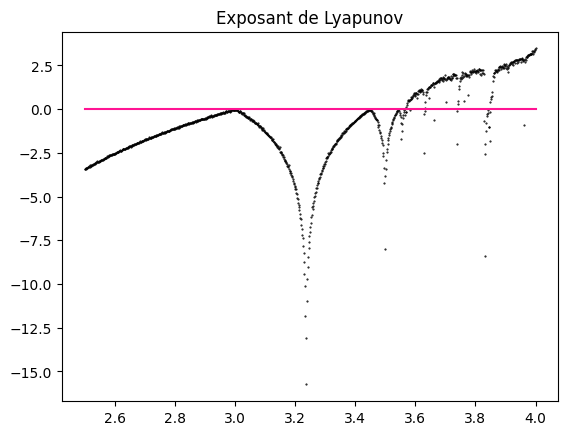

In [5]:
# Definition de la fonction calculant l'exposant
def exposant(r):
    x=0.1*random.random()
    e=0
    for i in range(500):
        e=e+m.log(abs(r*(1-2*f(x,r,i))))     # on ne considere evidemment pas de serie mais une somme partielle
                                             # d'indice assez grand (500 dans ce cas)
    return 0.01*e

# Graphe de l'exposant en fonction du parametre r
x=np.linspace(2.5,4,1000)                    # les valeurs du parametres 'r'
y=[exposant(r) for r in x]
plt.plot(x,y,'o',ms=0.5, color='black')

a=np.zeros(1000)
plt.plot(x,a, color='deeppink')

plt.title('Exposant de Lyapunov')

### Analyse et conclusion

* En comparant le diagramme de Bifuraction et celui de l'exposant de Lyapunov on voit qu'a partir de *r=3* on a la repartition du graphe en intervalles de plus en plus petits, chacun commençant par la valeur de *r* pour laquelle la suite a *n* d'adherences possibles quelque soit la valeur initiale, et se terminant par la valeur de *r* pour laquelle la suite a *2n* points d'adherences.
* L'evolution du nombre de 'limites' de la suites est exponentielle (*2<sup>n</sup>*). Ceci demontre l'instabilité de l’équation logistique.
